#Dataset Vinos

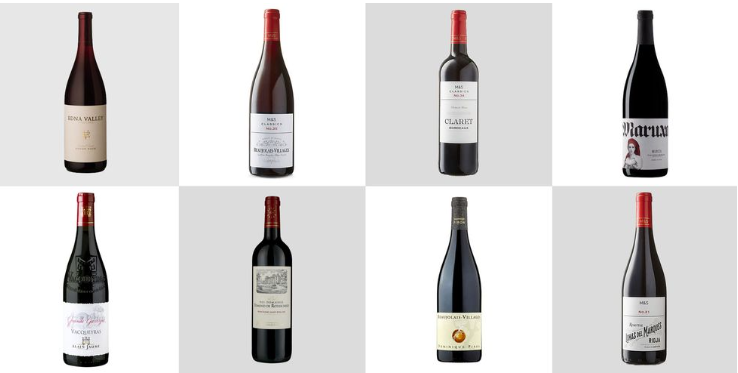

Se trata de un problema de clasificación. La calidad del vino toma uno de los tres valores posibles: [0, 1, 2]



---



---



In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import pandas as pd
import numpy as np
import time

import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler, Normalizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_wine
from keras.utils import np_utils

In [ ]:
X,y = load_wine(return_X_y=True, as_frame=True  )

In [ ]:
df = pd.DataFrame(X)
df['quality']=y

In [ ]:
df.sum()

alcohol                           2314.110000
malic_acid                         415.870000
ash                                421.240000
alcalinity_of_ash                 3470.100000
magnesium                        17754.000000
total_phenols                      408.530000
flavanoids                         361.210000
nonflavanoid_phenols                64.410000
proanthocyanins                    283.180000
color_intensity                    900.339999
hue                                170.426000
od280/od315_of_diluted_wines       464.880000
proline                         132947.000000
quality                            167.000000
dtype: float64

In [ ]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
quality                         0
dtype: int64



---



---



#I. Entrenamiento usando los datos originales

(sin escalar)

In [ ]:
#df=(df-df.mean())/df.std()
#df

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [ ]:
le = preprocessing.LabelEncoder()

le.fit(y_train)
le.fit(y_test)

y_train_categorical = np_utils.to_categorical(y_train)

y_test_categorical = np_utils.to_categorical(y_test)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X , y['quality'], test_size=0.15, stratify=y['quality'],random_state=5)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train )

In [ ]:
y_test_categorical.shape

(54, 3)

In [ ]:
inputs  = keras.Input(X_train.shape[1], name="CalidadVino")
hidden  = Dense( 5, activation="relu",    name="hidden"     )(inputs)
outputs = Dense( 3, activation="softmax", name="predictions")(hidden)

modelo = keras.Model(inputs=inputs, outputs=outputs)

config  = modelo.get_config()
weights = modelo.get_weights()

In [ ]:
for lr in [0.0001, 0.001, 0.01, 0.1]:
    model = keras.Model.from_config(config)
    model.set_weights(weights)

    opt = keras.optimizers.SGD( learning_rate = lr )
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    historial = model.fit(X_train, y_train_categorical,  epochs=100,  verbose=0)

    print('lr=',lr)
    model.evaluate(X_test, y_test_categorical)

lr= 0.0001
2/2 [==============================] - 0s 7ms/step - loss: 1.4402 - accuracy: 0.5556
lr= 0.001
2/2 [==============================] - 0s 9ms/step - loss: 0.9786 - accuracy: 0.5185
lr= 0.01
2/2 [==============================] - 0s 10ms/step - loss: 1.1252 - accuracy: 0.3333
lr= 0.1
2/2 [==============================] - 0s 8ms/step - loss: 1.1478 - accuracy: 0.3333


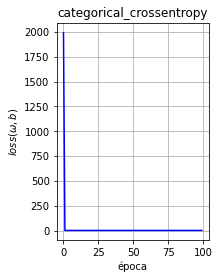

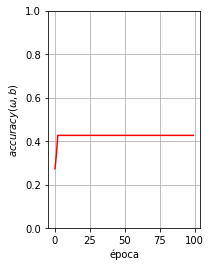

In [ ]:
plt.subplot(1,2,1)
plt.plot(historial.epoch,historial.history['loss'], 'b',label='error')
plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$loss(\omega, b)$')
plt.grid(True)
#plt.legend(loc='upper right')
plt.show()

plt.subplot(1,2,2)
plt.plot(historial.epoch,historial.history['accuracy'], 'r',label='precisión')
#plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$accuracy(\omega, b)$')
plt.ylim([0,1])
plt.grid(True)
#plt.legend(loc='lower right')
plt.show()

#II. Escalando los atributos

## 1 preprocessing.RobustScaler

In [ ]:
transformer = RobustScaler().fit(X_train)
X_train_robust = transformer.transform(X_train)

transformer = RobustScaler().fit(X_test)
X_test_robust = transformer.transform(X_test)

In [ ]:
inputs1 = keras.Input(X_train_robust.shape[1], name="Wines")
hidden1 = Dense(5, activation="relu", name="hidden1")(inputs1)
outputs1 = Dense(3, activation="softmax", name="predictions")(hidden1)

model1 = keras.Model(inputs=inputs1, outputs=outputs1)

config  = model1.get_config()
weights = model1.get_weights()

In [ ]:
for lr in [0.0001, 0.001, 0.01, 0.1]:
    model1 = keras.Model.from_config(config)
    model1.set_weights(weights)

    opt = keras.optimizers.SGD( learning_rate = lr )
    model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    historial = model1.fit(X_train_robust, y_train_categorical,  epochs=100,  verbose=0)

    print('lr=',lr)
    model1.evaluate(X_test_robust, y_test_categorical)

lr= 0.0001
2/2 [==============================] - 0s 9ms/step - loss: 1.1938 - accuracy: 0.4630
lr= 0.001
2/2 [==============================] - 0s 10ms/step - loss: 0.9586 - accuracy: 0.5741
lr= 0.01
2/2 [==============================] - 0s 8ms/step - loss: 0.4806 - accuracy: 0.9444
lr= 0.1
2/2 [==============================] - 0s 9ms/step - loss: 0.1727 - accuracy: 0.9630


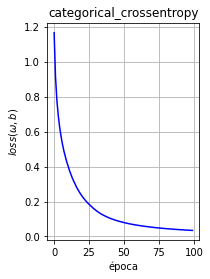

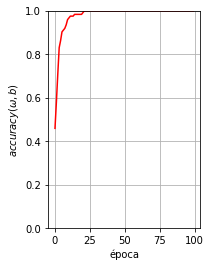

In [ ]:
plt.subplot(1,2,1)
plt.plot(historial.epoch,historial.history['loss'], 'b',label='error')
plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$loss(\omega, b)$')
plt.grid(True)
#plt.legend(loc='upper right')
plt.show()

plt.subplot(1,2,2)
plt.plot(historial.epoch,historial.history['accuracy'], 'r',label='precisión')
#plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$accuracy(\omega, b)$')
plt.ylim([0,1])
plt.grid(True)
#plt.legend(loc='lower right')
plt.show()

##2 StandardScaler

In [ ]:
transformer = StandardScaler().fit(X_train)
X_train_std = transformer.transform(X_train)

transformer = StandardScaler().fit(X_test)
X_test_std = transformer.transform(X_test)

In [ ]:
inputs2 = keras.Input(X_train_std.shape[1], name="Wines")
hidden2 = Dense(5, activation="relu", name="hidden2")(inputs2)
outputs2 = Dense(3, activation="softmax", name="predictions")(hidden2)

model2 = keras.Model(inputs=inputs2, outputs=outputs2)

config  = model2.get_config()
weights = model2.get_weights()

In [ ]:
for lr in [0.0001, 0.001, 0.01, 0.1]:
    model2 = keras.Model.from_config(config)
    model2.set_weights(weights)

    opt = keras.optimizers.SGD( learning_rate = lr )
    model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    historial = model2.fit(X_train_std, y_train_categorical,  epochs=100,  verbose=0)

    print('lr=',lr)
    model2.evaluate(X_test_std, y_test_categorical)

lr= 0.0001
2/2 [==============================] - 0s 12ms/step - loss: 0.8106 - accuracy: 0.7222
lr= 0.001
2/2 [==============================] - 0s 14ms/step - loss: 0.6856 - accuracy: 0.8889
lr= 0.01
2/2 [==============================] - 0s 14ms/step - loss: 0.1630 - accuracy: 1.0000
lr= 0.1
2/2 [==============================] - 0s 11ms/step - loss: 0.0255 - accuracy: 0.9815


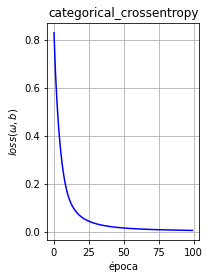

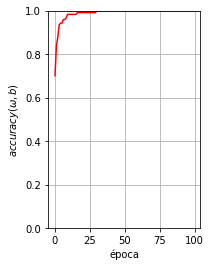

In [ ]:
plt.subplot(1,2,1)
plt.plot(historial.epoch,historial.history['loss'], 'b',label='error')
plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$loss(\omega, b)$')
plt.grid(True)
#plt.legend(loc='upper right')
plt.show()

plt.subplot(1,2,2)
plt.plot(historial.epoch,historial.history['accuracy'], 'r',label='precisión')
#plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$accuracy(\omega, b)$')
plt.ylim([0,1])
plt.grid(True)
#plt.legend(loc='lower right')
plt.show()

##3 MinMaxScaler

In [ ]:
minmaxscaler = MinMaxScaler().fit(X_train)
X_train_mms = minmaxscaler.transform(X_train)

minmaxscaler = MinMaxScaler().fit(X_test)
X_test_mms = minmaxscaler.transform(X_test)

In [ ]:
inputs3 = keras.Input(X_train_mms.shape[1], name="Wines")
hidden3 = Dense(5, activation="relu", name="hidden3")(inputs3)
outputs3 = Dense(3, activation="softmax", name="predictions")(hidden3)

model3 = keras.Model(inputs=inputs3, outputs=outputs3)

config  = model3.get_config()
weights = model3.get_weights()

In [ ]:
for lr in [0.0001, 0.001, 0.01, 0.1]:
    model3 = keras.Model.from_config(config)
    model3.set_weights(weights)

    opt = keras.optimizers.SGD( learning_rate = lr )
    model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    historial = model3.fit(X_train_mms, y_train_categorical,  epochs=100,  verbose=0)

    print('lr=',lr)
    model3.evaluate(X_test_mms, y_test_categorical)

lr= 0.0001
2/2 [==============================] - 0s 13ms/step - loss: 1.1165 - accuracy: 0.2963
lr= 0.001
2/2 [==============================] - 0s 9ms/step - loss: 1.0131 - accuracy: 0.3519
lr= 0.01
2/2 [==============================] - 0s 9ms/step - loss: 0.7494 - accuracy: 0.6296
lr= 0.1
2/2 [==============================] - 0s 20ms/step - loss: 0.0998 - accuracy: 1.0000


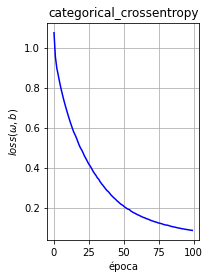

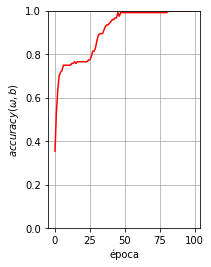

In [ ]:
plt.subplot(1,2,1)
plt.plot(historial.epoch,historial.history['loss'], 'b',label='error')
plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$loss(\omega, b)$')
plt.grid(True)
#plt.legend(loc='upper right')
plt.show()

plt.subplot(1,2,2)
plt.plot(historial.epoch,historial.history['accuracy'], 'r',label='precisión')
#plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$accuracy(\omega, b)$')
plt.ylim([0,1])
plt.grid(True)
#plt.legend(loc='lower right')
plt.show()

## 4 Normalizer

In [ ]:
normalizer = Normalizer().fit(X_train)
X_train_norm = normalizer.transform(X_train)

normalizer = Normalizer().fit(X_test)
X_test_norm = minmaxscaler.transform(X_test)

In [ ]:
inputs4 = keras.Input(X_train_norm.shape[1], name="Wines")
hidden4 = Dense(5, activation="relu", name="hidden4")(inputs4)
outputs4 = Dense(3, activation="softmax", name="predictions")(hidden4)

model4 = keras.Model(inputs=inputs4, outputs=outputs4)

config  = model4.get_config()
weights = model4.get_weights()

In [ ]:
for lr in [0.0001, 0.001, 0.01, 0.1]:
    model4 = keras.Model.from_config(config)
    model4.set_weights(weights)

    opt = keras.optimizers.SGD( learning_rate = lr )
    model4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    historial = model4.fit(X_train_norm, y_train_categorical,  epochs=100,  verbose=0)

    print('lr=',lr)
    model4.evaluate(X_test_norm, y_test_categorical)

lr= 0.0001
2/2 [==============================] - 0s 9ms/step - loss: 1.1913 - accuracy: 0.3889
lr= 0.001
2/2 [==============================] - 0s 9ms/step - loss: 1.1608 - accuracy: 0.3889
lr= 0.01
2/2 [==============================] - 0s 9ms/step - loss: 1.1350 - accuracy: 0.3148
lr= 0.1
2/2 [==============================] - 0s 10ms/step - loss: 1.0999 - accuracy: 0.3519


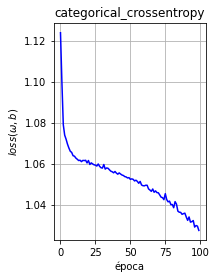

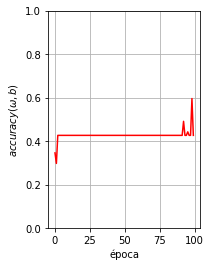

In [ ]:
plt.subplot(1,2,1)
plt.plot(historial.epoch,historial.history['loss'], 'b',label='error')
plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$loss(\omega, b)$')
plt.grid(True)
#plt.legend(loc='upper right')
plt.show()

plt.subplot(1,2,2)
plt.plot(historial.epoch,historial.history['accuracy'], 'r',label='precisión')
#plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$accuracy(\omega, b)$')
plt.ylim([0,1])
plt.grid(True)
#plt.legend(loc='lower right')
plt.show()



---



---



#III. Seleccionando los parámetros con mayor correlación con la calidad del vino


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
alcohol,1.00,0.09,0.21,-0.31,0.27,0.29,0.24,-0.16,0.14,0.55,-0.07,0.07,0.64,-0.33
malic_acid,0.09,1.00,0.16,0.29,-0.05,-0.34,-0.41,0.29,-0.22,0.25,-0.56,-0.37,-0.19,0.44
ash,0.21,0.16,1.00,0.44,0.29,0.13,0.12,0.19,0.01,0.26,-0.07,0.00,0.22,-0.05
alcalinity_of_ash,-0.31,0.29,0.44,1.00,-0.08,-0.32,-0.35,0.36,-0.20,0.02,-0.27,-0.28,-0.44,0.52
magnesium,0.27,-0.05,0.29,-0.08,1.00,0.21,0.20,-0.26,0.24,0.20,0.06,0.07,0.39,-0.21
total_phenols,0.29,-0.34,0.13,-0.32,0.21,1.00,0.86,-0.45,0.61,-0.06,0.43,0.70,0.50,-0.72
flavanoids,0.24,-0.41,0.12,-0.35,0.20,0.86,1.00,-0.54,0.65,-0.17,0.54,0.79,0.49,-0.85
nonflavanoid_phenols,-0.16,0.29,0.19,0.36,-0.26,-0.45,-0.54,1.00,-0.37,0.14,-0.26,-0.50,-0.31,0.49
proanthocyanins,0.14,-0.22,0.01,-0.20,0.24,0.61,0.65,-0.37,1.00,-0.03,0.30,0.52,0.33,-0.50
color_intensity,0.55,0.25,0.26,0.02,0.20,-0.06,-0.17,0.14,-0.03,1.00,-0.52,-0.43,0.32,0.27


In [ ]:
corr['quality']>0.4

alcohol                         False
malic_acid                       True
ash                             False
alcalinity_of_ash                True
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols             True
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
quality                          True
Name: quality, dtype: bool

In [ ]:
X = df[df.columns[corr['quality']>0.4]].copy()    #Selección de atributos
X = X[X.columns[X.columns != 'quality']]

X

,malic_acid,alcalinity_of_ash,nonflavanoid_phenols
0,1.71,15.6,0.28
1,1.78,11.2,0.26
2,2.36,18.6,0.30
3,1.95,16.8,0.24
4,2.59,21.0,0.39
...,...,...,...
173,5.65,20.5,0.52
174,3.91,23.0,0.43
175,4.28,20.0,0.43
176,2.59,20.0,0.53


## Entrenamiento con los datos originales de la selección

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=45)

In [ ]:
inputs5 = keras.Input(X_train2.shape[1], name="Wines")
hidden5 = Dense(5, activation="relu", name="hidden5")(inputs5)
outputs5 = Dense(3, activation="softmax", name="predictions")(hidden5)

model5 = keras.Model(inputs=inputs5, outputs=outputs5)

config  = model5.get_config()
weights = model5.get_weights()

In [ ]:
for lr in [0.0001, 0.001, 0.01, 0.1]:
    model5 = keras.Model.from_config(config)
    model5.set_weights(weights)

    opt = keras.optimizers.SGD( learning_rate = lr )
    model5.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    historial = model5.fit(X_train2, y_train_categorical,  epochs=100,  verbose=0)

    print('lr=',lr)
    model5.evaluate(X_test2, y_test_categorical)

lr= 0.0001
2/2 [==============================] - 0s 10ms/step - loss: 1.3896 - accuracy: 0.3333
lr= 0.001
2/2 [==============================] - 0s 16ms/step - loss: 1.1502 - accuracy: 0.3333
lr= 0.01
2/2 [==============================] - 0s 7ms/step - loss: 1.1353 - accuracy: 0.3333
lr= 0.1
2/2 [==============================] - 0s 10ms/step - loss: 1.1482 - accuracy: 0.3333


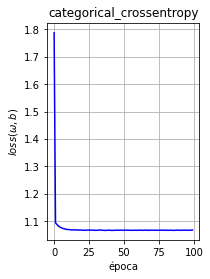

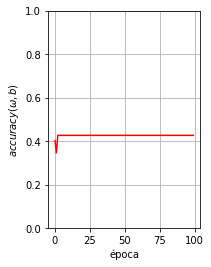

In [ ]:
plt.subplot(1,2,1)
plt.plot(historial.epoch,historial.history['loss'], 'b',label='error')
plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$loss(\omega, b)$')
plt.grid(True)
#plt.legend(loc='upper right')
plt.show()

plt.subplot(1,2,2)
plt.plot(historial.epoch,historial.history['accuracy'], 'r',label='precisión')
#plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$accuracy(\omega, b)$')
plt.ylim([0,1])
plt.grid(True)
#plt.legend(loc='lower right')
plt.show()

#IV. Escalar el nuevo dataset

## 1 preprocessing.RobustScaler

In [ ]:
transformer = RobustScaler().fit(X_train2)
X_train_robust2 = transformer.transform(X_train2)

transformer = RobustScaler().fit(X_test2)
X_test_robust2 = transformer.transform(X_test2)

In [ ]:
inputs6 = keras.Input(X_train_robust2.shape[1], name="Wines")
hidden6 = Dense(5, activation="relu", name="hidden6")(inputs6)
outputs6 = Dense(3, activation="softmax", name="predictions")(hidden6)

model6 = keras.Model(inputs=inputs6, outputs=outputs6)

config  = model6.get_config()
weights = model6.get_weights()

In [ ]:
for lr in [0.0001, 0.001, 0.01, 0.1]:
    model6 = keras.Model.from_config(config)
    model6.set_weights(weights)

    opt = keras.optimizers.SGD( learning_rate = lr )
    model6.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    historial = model6.fit(X_train2, y_train_categorical,  epochs=100,  verbose=0)

    print('lr=',lr)
    model6.evaluate(X_test2, y_test_categorical)

lr= 0.0001
2/2 [==============================] - 0s 11ms/step - loss: 1.2557 - accuracy: 0.3333
lr= 0.001
2/2 [==============================] - 0s 12ms/step - loss: 1.2125 - accuracy: 0.3333
lr= 0.01
2/2 [==============================] - 0s 9ms/step - loss: 1.1539 - accuracy: 0.3333
lr= 0.1
2/2 [==============================] - 0s 9ms/step - loss: 1.1494 - accuracy: 0.3333


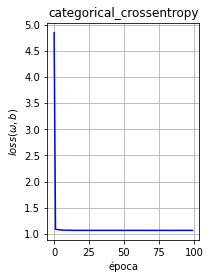

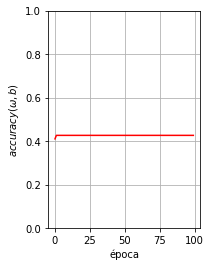

In [ ]:
plt.subplot(1,2,1)
plt.plot(historial.epoch,historial.history['loss'], 'b',label='error')
plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$loss(\omega, b)$')
plt.grid(True)
#plt.legend(loc='upper right')
plt.show()

plt.subplot(1,2,2)
plt.plot(historial.epoch,historial.history['accuracy'], 'r',label='precisión')
#plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$accuracy(\omega, b)$')
plt.ylim([0,1])
plt.grid(True)
#plt.legend(loc='lower right')
plt.show()

##2 StandardScaler

In [ ]:
transformer = StandardScaler().fit(X_train2)
X_train_std2 = transformer.transform(X_train2)

transformer = StandardScaler().fit(X_test2)
X_test_std2 = transformer.transform(X_test2)

In [ ]:
inputs7 = keras.Input(X_train_std2.shape[1], name="Wines")
hidden7 = Dense(5, activation="relu", name="hidden7")(inputs7)
outputs7 = Dense(3, activation="softmax", name="predictions")(hidden7)

model7 = keras.Model(inputs=inputs7, outputs=outputs7)

config  = model7.get_config()
weights = model7.get_weights()

In [ ]:
for lr in [0.0001, 0.001, 0.01, 0.1]:
    model7 = keras.Model.from_config(config)
    model7.set_weights(weights)

    opt = keras.optimizers.SGD( learning_rate = lr )
    model7.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    historial = model7.fit(X_train2, y_train_categorical,  epochs=100,  verbose=0)

    print('lr=',lr)
    model7.evaluate(X_test2, y_test_categorical)

lr= 0.0001
2/2 [==============================] - 0s 10ms/step - loss: 1.2412 - accuracy: 0.4444
lr= 0.001
2/2 [==============================] - 0s 7ms/step - loss: 1.1612 - accuracy: 0.1296
lr= 0.01
2/2 [==============================] - 0s 9ms/step - loss: 1.0995 - accuracy: 0.4074
lr= 0.1
2/2 [==============================] - 0s 7ms/step - loss: 1.1482 - accuracy: 0.3333


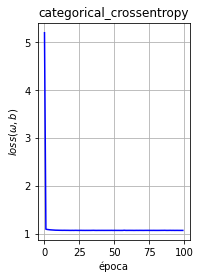

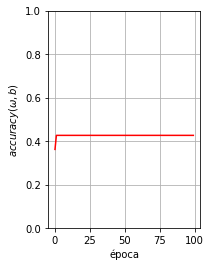

In [ ]:
plt.subplot(1,2,1)
plt.plot(historial.epoch,historial.history['loss'], 'b',label='error')
plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$loss(\omega, b)$')
plt.grid(True)
#plt.legend(loc='upper right')
plt.show()

plt.subplot(1,2,2)
plt.plot(historial.epoch,historial.history['accuracy'], 'r',label='precisión')
#plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$accuracy(\omega, b)$')
plt.ylim([0,1])
plt.grid(True)
#plt.legend(loc='lower right')
plt.show()

##3 MinMaxScaler

In [ ]:
minmaxscaler = MinMaxScaler().fit(X_train2)
X_train_mms2 = minmaxscaler.transform(X_train2)

minmaxscaler = MinMaxScaler().fit(X_test2)
X_test_mms2 = minmaxscaler.transform(X_test2)

In [ ]:
inputs8 = keras.Input(X_train_mms2.shape[1], name="Wines")
hidden8 = Dense(5, activation="relu", name="hidden8")(inputs8)
outputs8 = Dense(3, activation="softmax", name="predictions")(hidden8)

model8 = keras.Model(inputs=inputs8, outputs=outputs8)

config  = model8.get_config()
weights = model8.get_weights()

In [ ]:
for lr in [0.0001, 0.001, 0.01, 0.1]:
    model8 = keras.Model.from_config(config)
    model8.set_weights(weights)

    opt = keras.optimizers.SGD( learning_rate = lr )
    model8.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    historial = model8.fit(X_train2, y_train_categorical,  epochs=100,  verbose=0)

    print('lr=',lr)
    model8.evaluate(X_test2, y_test_categorical)

lr= 0.0001
2/2 [==============================] - 0s 14ms/step - loss: 1.1443 - accuracy: 0.1667
lr= 0.001
2/2 [==============================] - 0s 9ms/step - loss: 1.1145 - accuracy: 0.3148
lr= 0.01
2/2 [==============================] - 0s 9ms/step - loss: 0.9723 - accuracy: 0.5370
lr= 0.1
2/2 [==============================] - 0s 13ms/step - loss: 1.1482 - accuracy: 0.3333


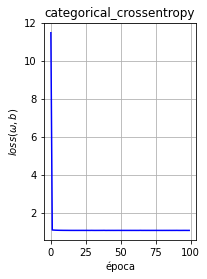

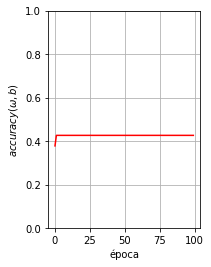

In [ ]:
plt.subplot(1,2,1)
plt.plot(historial.epoch,historial.history['loss'], 'b',label='error')
plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$loss(\omega, b)$')
plt.grid(True)
#plt.legend(loc='upper right')
plt.show()

plt.subplot(1,2,2)
plt.plot(historial.epoch,historial.history['accuracy'], 'r',label='precisión')
#plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$accuracy(\omega, b)$')
plt.ylim([0,1])
plt.grid(True)
#plt.legend(loc='lower right')
plt.show()

## 4 Normalizer

In [ ]:
normalizer = Normalizer().fit(X_train2)
X_train_norm2 = normalizer.transform(X_train2)

normalizer = Normalizer().fit(X_test2)
X_test_norm2 = minmaxscaler.transform(X_test2)

In [ ]:
inputs9 = keras.Input(X_train_norm2.shape[1], name="Wines")
hidden9 = Dense(5, activation="relu", name="hidden9")(inputs9)
outputs9 = Dense(3, activation="softmax", name="predictions")(hidden9)

model9 = keras.Model(inputs=inputs8, outputs=outputs8)

config  = model9.get_config()
weights = model9.get_weights()

In [ ]:
for lr in [0.0001, 0.001, 0.01, 0.1]:
    model9 = keras.Model.from_config(config)
    model9.set_weights(weights)

    opt = keras.optimizers.SGD( learning_rate = lr )
    model9.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    historial = model9.fit(X_train2, y_train_categorical,  epochs=100,  verbose=0)

    print('lr=',lr)
    model9.evaluate(X_test2, y_test_categorical)

lr= 0.0001
2/2 [==============================] - 0s 8ms/step - loss: 1.1437 - accuracy: 0.1667
lr= 0.001
2/2 [==============================] - 1s 9ms/step - loss: 1.1005 - accuracy: 0.2037
lr= 0.01
2/2 [==============================] - 0s 8ms/step - loss: 1.1607 - accuracy: 0.4074
lr= 0.1
2/2 [==============================] - 0s 10ms/step - loss: 1.1479 - accuracy: 0.3333


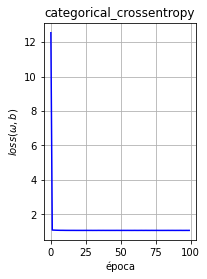

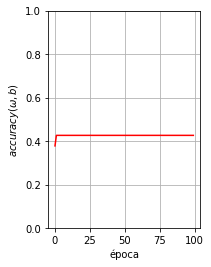

In [ ]:
plt.subplot(1,2,1)
plt.plot(historial.epoch,historial.history['loss'], 'b',label='error')
plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$loss(\omega, b)$')
plt.grid(True)
#plt.legend(loc='upper right')
plt.show()

plt.subplot(1,2,2)
plt.plot(historial.epoch,historial.history['accuracy'], 'r',label='precisión')
#plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$accuracy(\omega, b)$')
plt.ylim([0,1])
plt.grid(True)
#plt.legend(loc='lower right')
plt.show()